<a href="https://colab.research.google.com/github/SyedaAttiraHashmi/ML-Projects/blob/main/Heart_disease_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
import pickle
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
data = pd.read_csv("/content/HeartDisease.csv", sep=";")
print("Number of rows: %d" % data.shape[0])
print("Number of columns: %d" % data.shape[1])

Number of rows: 70000
Number of columns: 13


In [ ]:
data.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [ ]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
data['age'] = round(data['age']/365.25,2)

In [ ]:

data.drop(['id'], axis=1, inplace= True)

In [ ]:
data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.36,2,168,62.0,110,80,1,1,0,0,1,0
1,55.38,1,156,85.0,140,90,3,1,0,0,1,1
2,51.63,1,165,64.0,130,70,3,1,0,0,0,1
3,48.25,2,169,82.0,150,100,1,1,0,0,1,1
4,47.84,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.68,2,168,76.0,120,80,1,1,1,0,1,0
69996,61.88,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.20,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.41,1,163,72.0,135,80,1,2,0,0,0,1


In [ ]:
data.duplicated().sum()

75

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69925 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69925 non-null  float64
 1   gender       69925 non-null  int64  
 2   height       69925 non-null  int64  
 3   weight       69925 non-null  float64
 4   ap_hi        69925 non-null  int64  
 5   ap_lo        69925 non-null  int64  
 6   cholesterol  69925 non-null  int64  
 7   gluc         69925 non-null  int64  
 8   smoke        69925 non-null  int64  
 9   alco         69925 non-null  int64  
 10  active       69925 non-null  int64  
 11  cardio       69925 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 6.9 MB


#Exploratory Data Analysis

In [ ]:
data['cardio'].value_counts()

0    34964
1    34961
Name: cardio, dtype: int64

In [ ]:
data['gender'].value_counts()

1    45470
2    24455
Name: gender, dtype: int64

<Axes: title={'center': 'Distribution of Heart Disease'}, ylabel='cardio'>

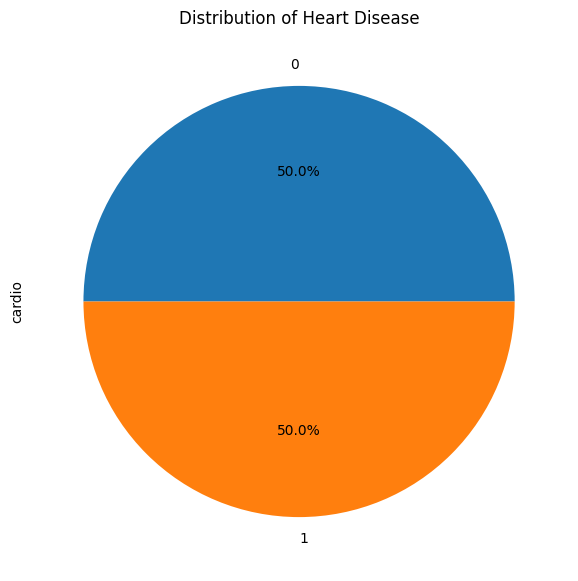

In [ ]:
plt.title("Distribution of Heart Disease")
data['cardio'].value_counts().plot(kind="pie", autopct='%.1f%%', figsize=(7,7))

##Observation
The entire number of patients with heart diseases equals the total number of patients without heart problems.

<Axes: title={'center': 'Heart Disease vs Age'}, xlabel='cardio', ylabel='age'>

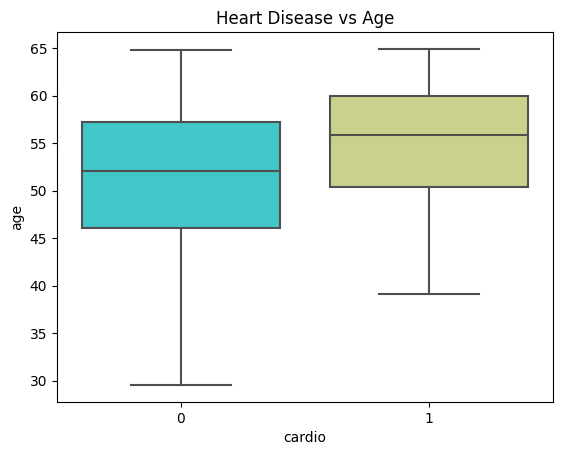

In [ ]:
plt.title("Heart Disease vs Age")
sns.boxplot(x='cardio', y = 'age', data= data, palette= 'rainbow')

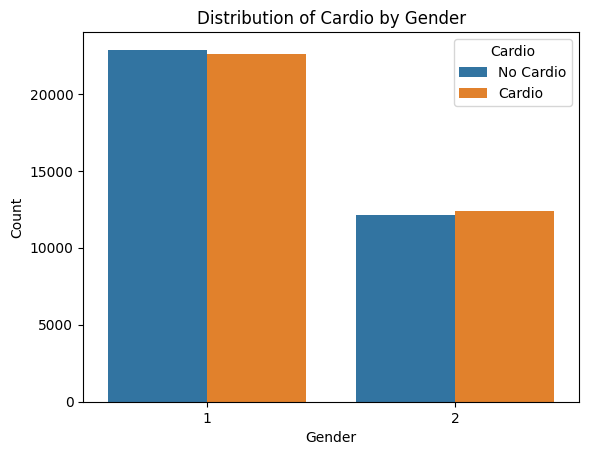

In [ ]:
plt.title("Distribution of Cardio by Gender")
sns.countplot(data=data, x='gender', hue='cardio')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title='Cardio', labels=['No Cardio', 'Cardio'])
plt.show()

"1" is the male
"2" is the female
##Observation
The accompanying count plot shows that males have a far higher risk of developing heart disease than females.

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data1, x='cholesterol', bins=30, kde=True, color='skyblue')
plt.title("Cholesterol Distribution - Histogram")
plt.xlabel("Cholesterol Level")
plt.ylabel("Frequency")
plt.show()

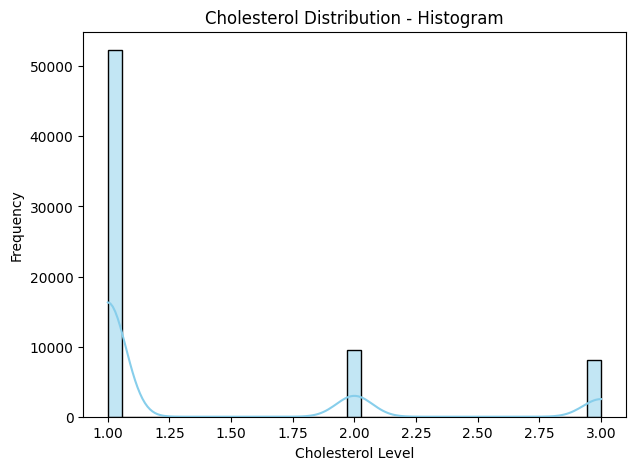

In [ ]:
plt.figure(figsize=(7,5))
sns.histplot(data= data, x= 'cholesterol', bins = 35, kde= True, color = 'skyblue')
plt.title("Cholesterol Distribution - Histogram")
plt.xlabel("Cholesterol Level")
plt.ylabel("Frequency")
plt.show()

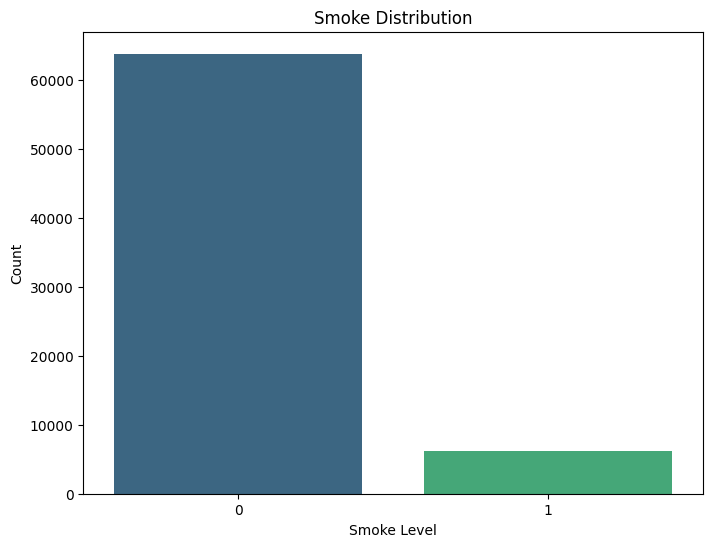

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='smoke', palette='viridis', color='purple')
plt.title("Smoke Distribution")
plt.xlabel("Smoke Level")
plt.ylabel("Count")
plt.show()

#CORRELATION

<Axes: >

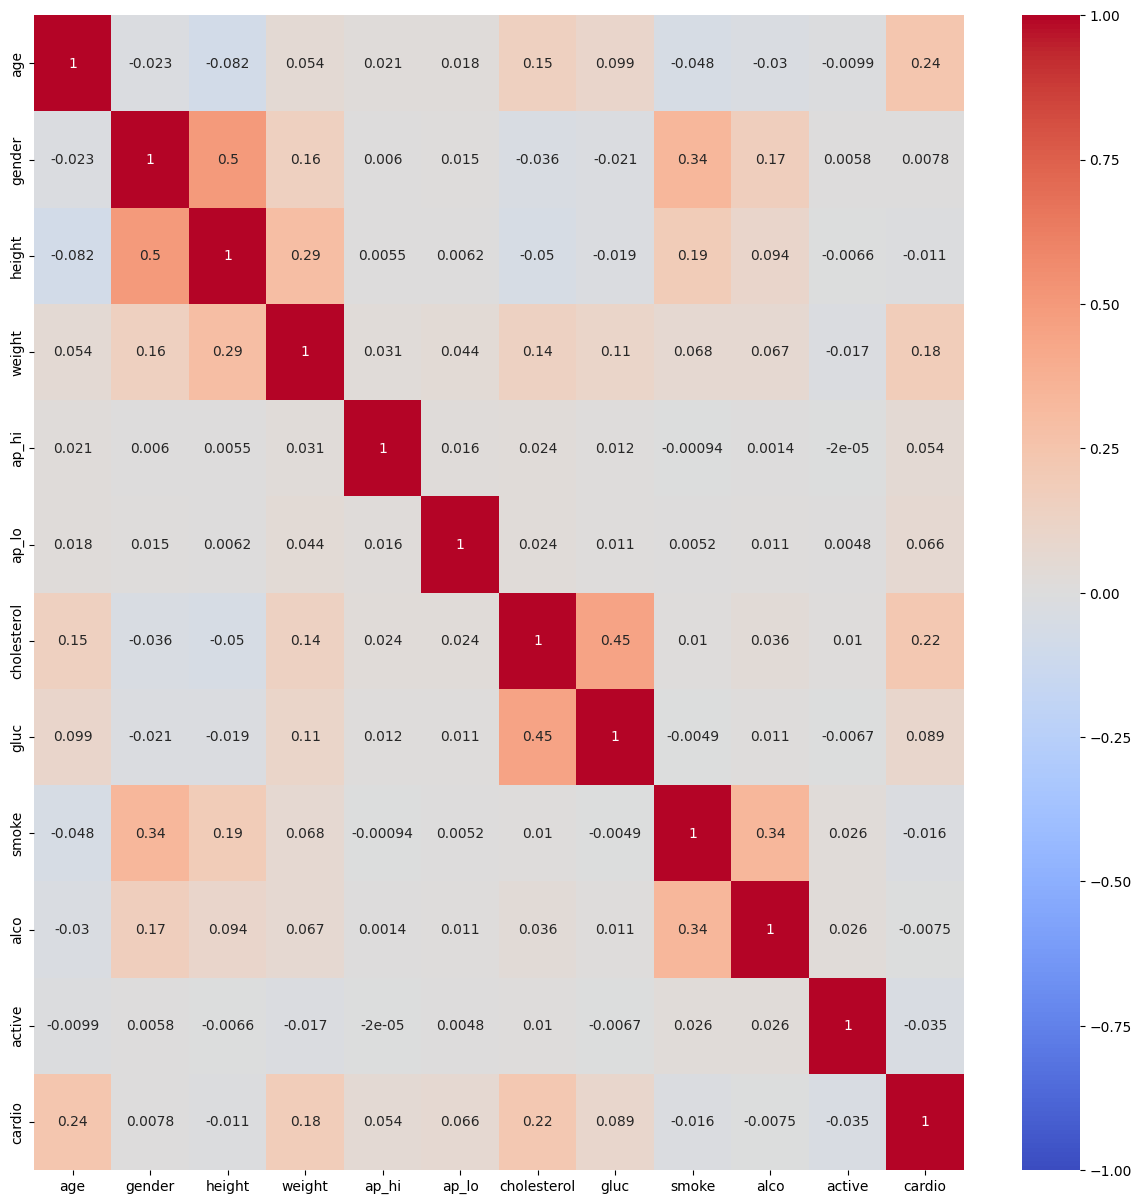

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm')

#Data Prepration For ML

In [ ]:
X = data.drop(columns=["cardio"])
y = data["cardio"]

#Split the Data into Training and Testing Dataset

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#Apply Randon Forest Algorithm

In [ ]:
model1 = RandomForestClassifier(n_estimators=30)
model1.fit(X_train, y_train)
rf=model1.score(X_test, y_test)


In [ ]:
accuracy_RF = rf
accuracy_RF

0.7121201287093314

In [ ]:
# Convert accuracy to percentage

accuracy_percentage_RF = accuracy_RF * 100

print(f"Random Forest Accuracy: {accuracy_percentage_RF:.2f}%")

Random Forest Accuracy: 71.21%


In [ ]:
ypred = model1.predict(X_test)
ypred

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, ypred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[5134 1795]
 [2233 4823]]


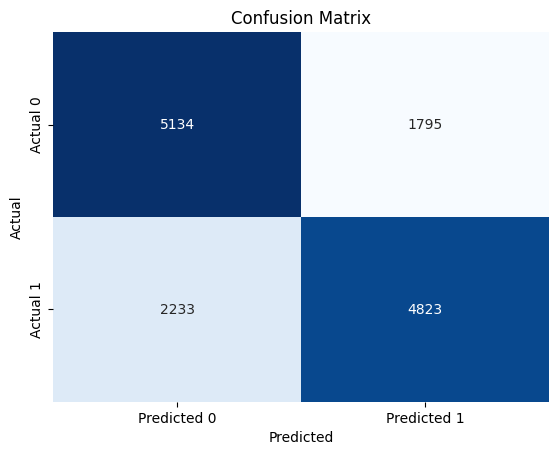

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Assuming the confusion matrix is stored in a variable called 'conf_matrix'
conf_matrix = [[5134, 1795],
                 [2233, 4823]]





# Extracting true negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]

# Calculating accuracy
accuracy = accuracy_score(y_test, ypred)* 100

# Calculating precision
precision = precision_score(y_test, ypred)* 100

# Calculating recall
recall = recall_score(y_test, ypred)* 100

# Calculating F1-score
f1 = f1_score(y_test, ypred)* 100

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 71.1977
Precision: 72.8770
Recall: 68.3532
F1-Score: 70.5426


#Apply Decision Tree Algorithm

In [ ]:
model2 = tree.DecisionTreeClassifier(criterion='entropy')
model2.fit(X_train, y_train)
dt = model2.score(X_train, y_train)

In [ ]:
accuracy_DT = dt
accuracy_DT

0.9993385770468359

In [ ]:
# Convert accuracy to percentage

accuracy_percentage_DT = accuracy_DT * 100

print(f"Decision Tree Accuracy: {accuracy_percentage_DT:.2f}%")

Decision Tree Accuracy: 99.94%


In [ ]:
y_pred_DT = model2.predict(X_test)
y_pred_DT

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:

conf_matrix = confusion_matrix(y_test, y_pred_DT)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4430 2499]
 [2626 4430]]


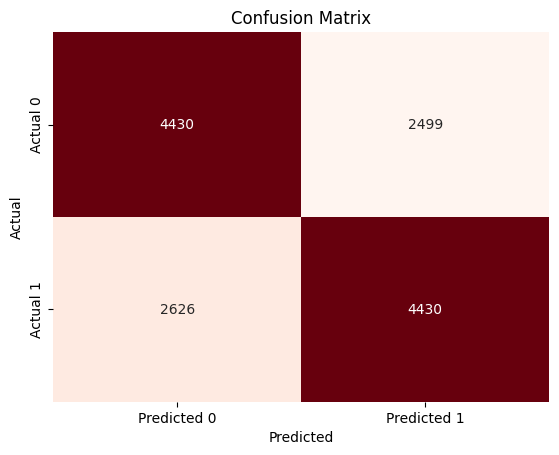

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Assuming the confusion matrix is stored in a variable called 'conf_matrix'
conf_matrix = [[4430, 2499],
                 [2626, 4430]]





# Extracting true negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred_DT)* 100

# Calculating precision
precision = precision_score(y_test, y_pred_DT)* 100

# Calculating recall
recall = recall_score(y_test, y_pred_DT)* 100

# Calculating F1-score
f1 = f1_score(y_test, y_pred_DT)* 100

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 63.3536
Precision: 63.9342
Recall: 62.7834
F1-Score: 63.3536


#Apply SVM Algorithm

In [ ]:
model3 = SVC()
model3.fit(X_train, y_train)
SV=model3.score(X_test, y_test)


In [ ]:
accuracy_svm = SV
accuracy_svm

0.7214873078298176

In [ ]:
# Convert accuracy to percentage

accuracy_percentage_SVM = accuracy_svm * 100

print(f"SVM Accuracy: {accuracy_percentage_SVM:.2f}%")

SVM Accuracy: 72.15%


In [ ]:
y_pred_SVM = model3.predict(X_test)
y_pred_SVM

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
cn = confusion_matrix(y_test, y_pred_SVM)

print("Confusion Matrix:")
print(cn)

Confusion Matrix:
[[5675 1254]
 [2666 4390]]


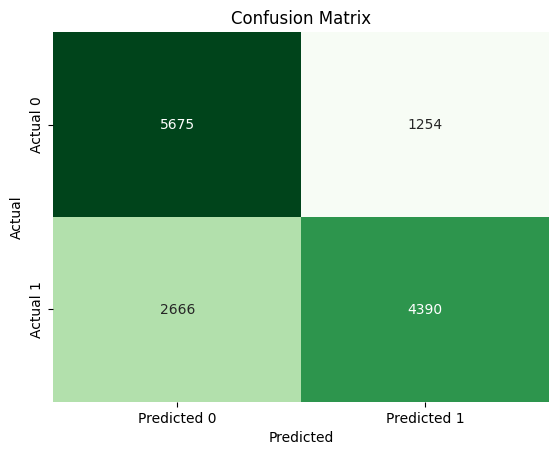

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
sns.heatmap(cn, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Assuming the confusion matrix is stored in a variable called 'conf_matrix'
conf_matrix = [[5675, 1254],
                [2666, 4390]]



# Extracting true negatives, false positives, false negatives, and true positives
tn, fp, fn, tp = conf_matrix[0][0], conf_matrix[0][1], conf_matrix[1][0], conf_matrix[1][1]

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred_SVM)* 100

# Calculating precision
precision = precision_score(y_test, y_pred_SVM)* 100

# Calculating recall
recall = recall_score(y_test, y_pred_SVM)* 100

# Calculating F1-score
f1 = f1_score(y_test, y_pred_SVM)* 100

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 71.9700
Precision: 77.7817
Recall: 62.2166
F1-Score: 69.1339
